In [52]:
#NOT:8.aya ait bilgiler ön işlemlerden geçirildikten sonra modeller tarafından eğitildi ve R2 metriğine göre en başarılı algoritma pickle haline getirild.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [54]:
df_proje = pd.read_csv("apartments_pl_2023_08.csv")
df_proje

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,ae88d7ea0a7a5fa0e9d287cfd78e5676,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,...,0.164,cooperative,brick,NaN,yes,yes,no,no,yes,789000
18901,6a4b30b5fcdee00bfe5bcc0da82df9b1,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,...,0.428,condominium,NaN,NaN,no,yes,no,no,yes,699000
18902,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,...,0.205,condominium,brick,NaN,yes,no,no,no,no,360000
18903,d971c4ed3aab9919bf203e96019a678e,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000


## **VERİLERİN İNCELENMESİ**

In [55]:
df_proje.drop(columns=["id"], inplace=True)
df_proje.shape

(18905, 27)

In [56]:
df_proje.index = range(1, len(df_proje) + 1)

df_proje

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
1,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
2,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
3,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
4,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
5,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,1.96,...,0.164,cooperative,brick,NaN,yes,yes,no,no,yes,789000
18902,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,3.04,...,0.428,condominium,NaN,NaN,no,yes,no,no,yes,699000
18903,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,0.65,...,0.205,condominium,brick,NaN,yes,no,no,no,no,360000
18904,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,0.65,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000


In [57]:
print(df_proje.head())
print(df_proje.tail())

       city          type  squareMeters  rooms  floor  floorCount  buildYear  \
1  szczecin  blockOfFlats         63.00    3.0    4.0        10.0     1980.0   
2  szczecin  blockOfFlats         36.00    2.0    8.0        10.0        NaN   
3  szczecin      tenement         73.02    3.0    2.0         3.0        NaN   
4  szczecin      tenement         87.60    3.0    2.0         3.0        NaN   
5  szczecin  blockOfFlats         66.00    3.0    1.0         3.0        NaN   

    latitude  longitude  centreDistance  ...  pharmacyDistance    ownership  \
1  53.378933  14.625296            6.53  ...             0.413  condominium   
2  53.442692  14.559690            2.15  ...             0.205  cooperative   
3  53.452222  14.553333            3.24  ...             0.280  condominium   
4  53.435100  14.532900            2.27  ...             0.087  condominium   
5  53.410278  14.503611            4.07  ...             0.514  condominium   

   buildingMaterial  condition  hasParkingSp

In [58]:
df_proje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18905 entries, 1 to 18905
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  18905 non-null  object 
 1   type                  14866 non-null  object 
 2   squareMeters          18905 non-null  float64
 3   rooms                 18905 non-null  float64
 4   floor                 15467 non-null  float64
 5   floorCount            18643 non-null  float64
 6   buildYear             15634 non-null  float64
 7   latitude              18905 non-null  float64
 8   longitude             18905 non-null  float64
 9   centreDistance        18905 non-null  float64
 10  poiCount              18905 non-null  float64
 11  schoolDistance        18891 non-null  float64
 12  clinicDistance        18817 non-null  float64
 13  postOfficeDistance    18880 non-null  float64
 14  kindergartenDistance  18892 non-null  float64
 15  restaurantDistance 

In [59]:
info_table = pd.DataFrame(df_proje.dtypes, columns=['Data Type'])

Text(0, 0.5, 'Sütunlar')

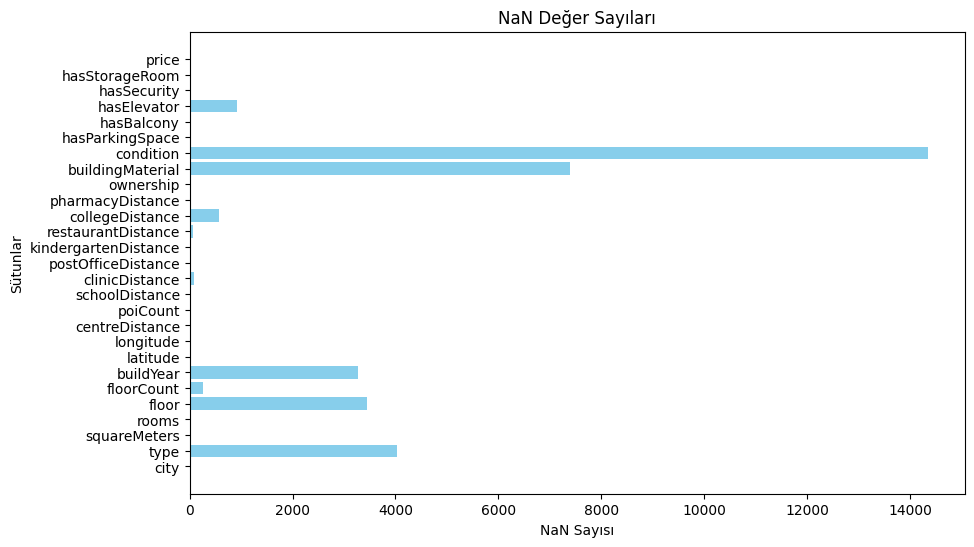

In [60]:


missing_data = pd.DataFrame(df_proje.isnull().sum(), columns=['NaN_Sayısı'])


plt.figure(figsize=(10, 6))
plt.barh(missing_data.index, missing_data['NaN_Sayısı'], color='skyblue')
plt.title('NaN Değer Sayıları')
plt.xlabel('NaN Sayısı')
plt.ylabel('Sütunlar')




In [61]:
# Numerik ve kategorik sütunları ayır
num_cols = df_proje.select_dtypes([np.number]).columns
cat_cols = df_proje.select_dtypes(['object']).columns

In [62]:
df_nums = df_proje[num_cols].reset_index(drop=True)

In [63]:
cat_cols = df_proje.select_dtypes(['object']).columns
df_cats = df_proje[cat_cols].reset_index(drop=True)

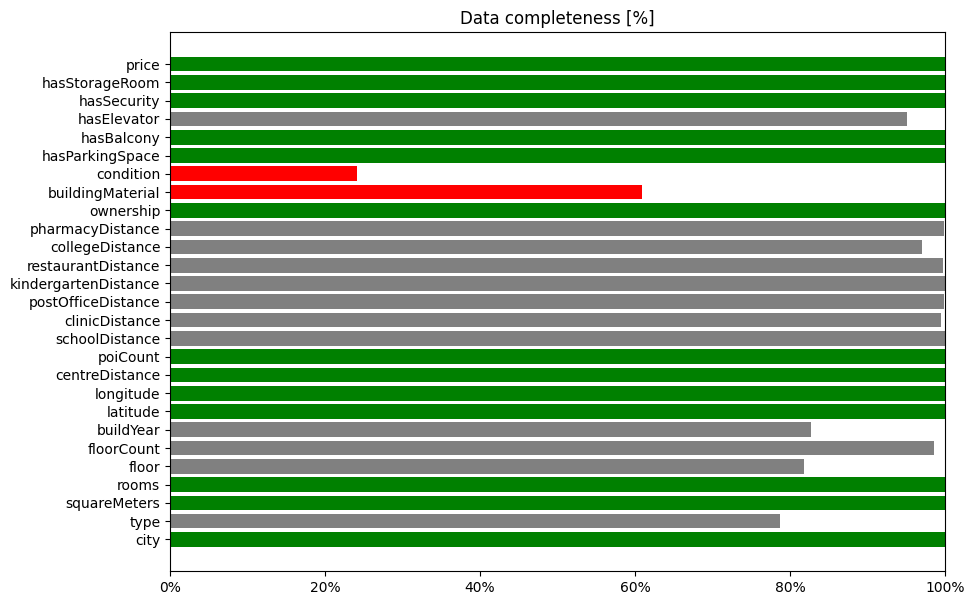

In [64]:
Cols = df_proje.columns
nonEmpty = []
barColors = []

for colName in Cols:
  completeness = 1-len(df_proje[df_proje[colName].isnull()])/len(df_proje)
  nonEmpty.append(completeness)


  if(completeness == 1):
     barColors.append('green')
  elif completeness < 0.75:
    barColors.append('red')
  else:
     barColors.append('grey')

def percent_formatter(x, pos):
    return str(round(x*100)) + "%"



fig, axs = plt.subplots(figsize=(10, 7))
axs.set_title("Data completeness [%]")
axs.barh(Cols, nonEmpty, color=barColors)
axs.set_xlim(0, 1)
axs.xaxis.set_major_formatter(percent_formatter)
plt.show()



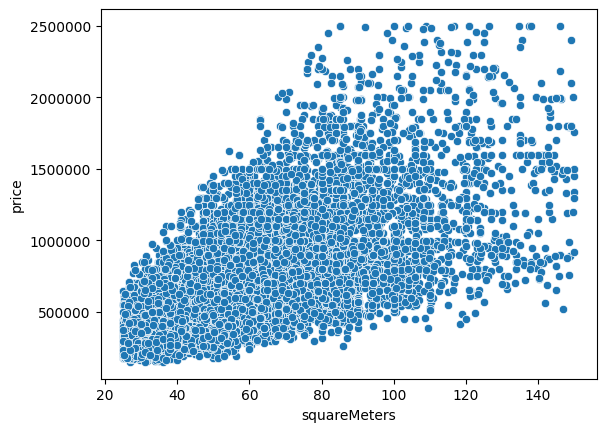

In [65]:
import seaborn as sns
# x(squaremeters) ve y(price) arasındaki ilişkiyi göster.
sns.scatterplot(x="squareMeters", y='price', data=df_proje)
plt.ticklabel_format(style='plain')
plt.show()


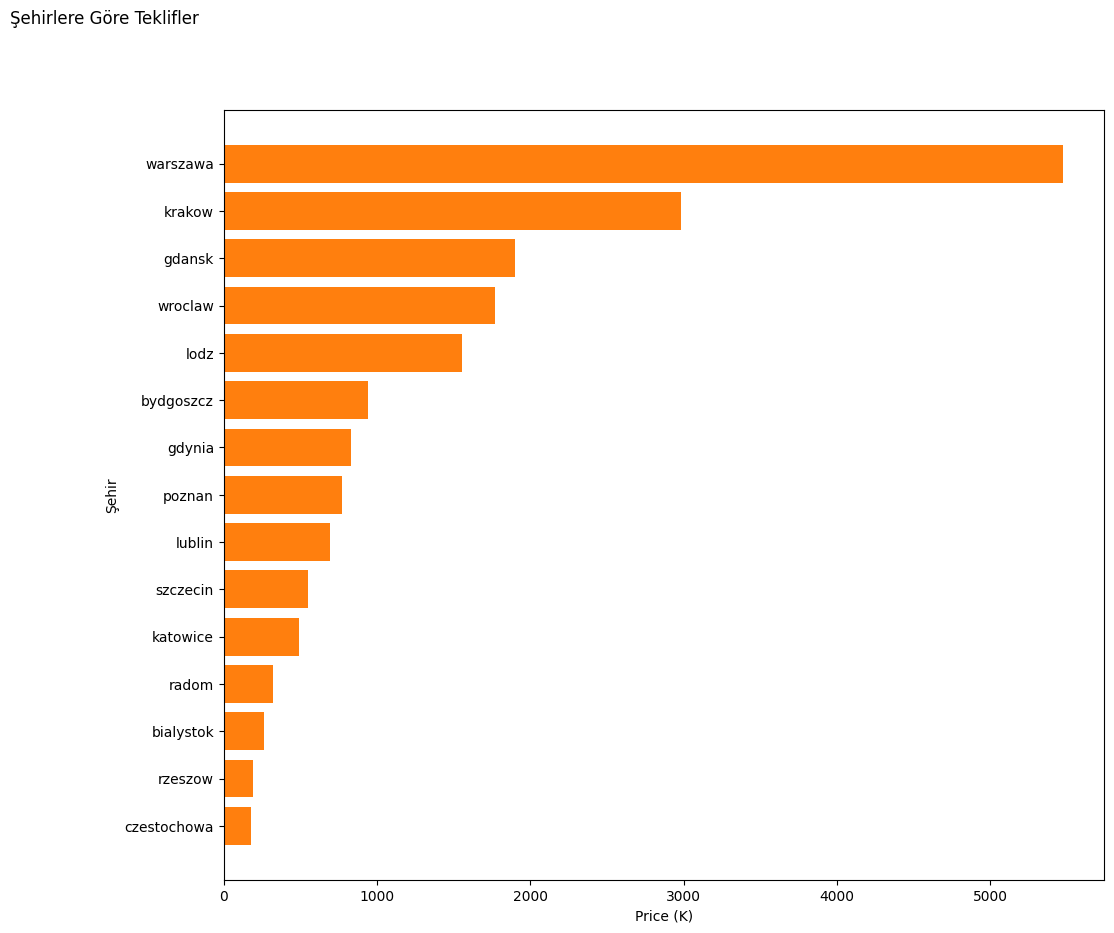

           city  sayı
13     warszawa  5471
6        krakow  2983
3        gdansk  1898
14      wroclaw  1768
7          lodz  1555
1     bydgoszcz   941
4        gdynia   830
9        poznan   773
8        lublin   691
12     szczecin   552
5      katowice   488
10        radom   324
0     bialystok   262
11      rzeszow   194
2   czestochowa   175


In [66]:

cityNames = df_proje.city.unique()

cityData = {'tüm şehirler': df_proje}

for cityName in cityNames:
    cityData[cityName] = df_proje[df_proje.city == cityName]


cityStats = pd.DataFrame(df_proje.groupby(['city'])['price'].count()).reset_index().rename({'price': 'sayı'}, axis=1).sort_values(['sayı'], ascending=True)

fig = plt.figure(figsize=(25, 10))


fig.suptitle('Şehirlere Göre Teklifler')
plt.subplot(1, 2, 2)
plt.barh(cityStats['city'], cityStats['sayı'])
plt.xlabel('Price (K)')
plt.ylabel('Şehir')
plt.subplot(1, 2, 2)
plt.barh(cityStats['city'], cityStats['sayı'])
plt.show()


cityNames = cityStats['city'].to_list()
cityNames

cityStatsSorted = cityStats.sort_values(by='sayı', ascending=False)


print(cityStatsSorted)

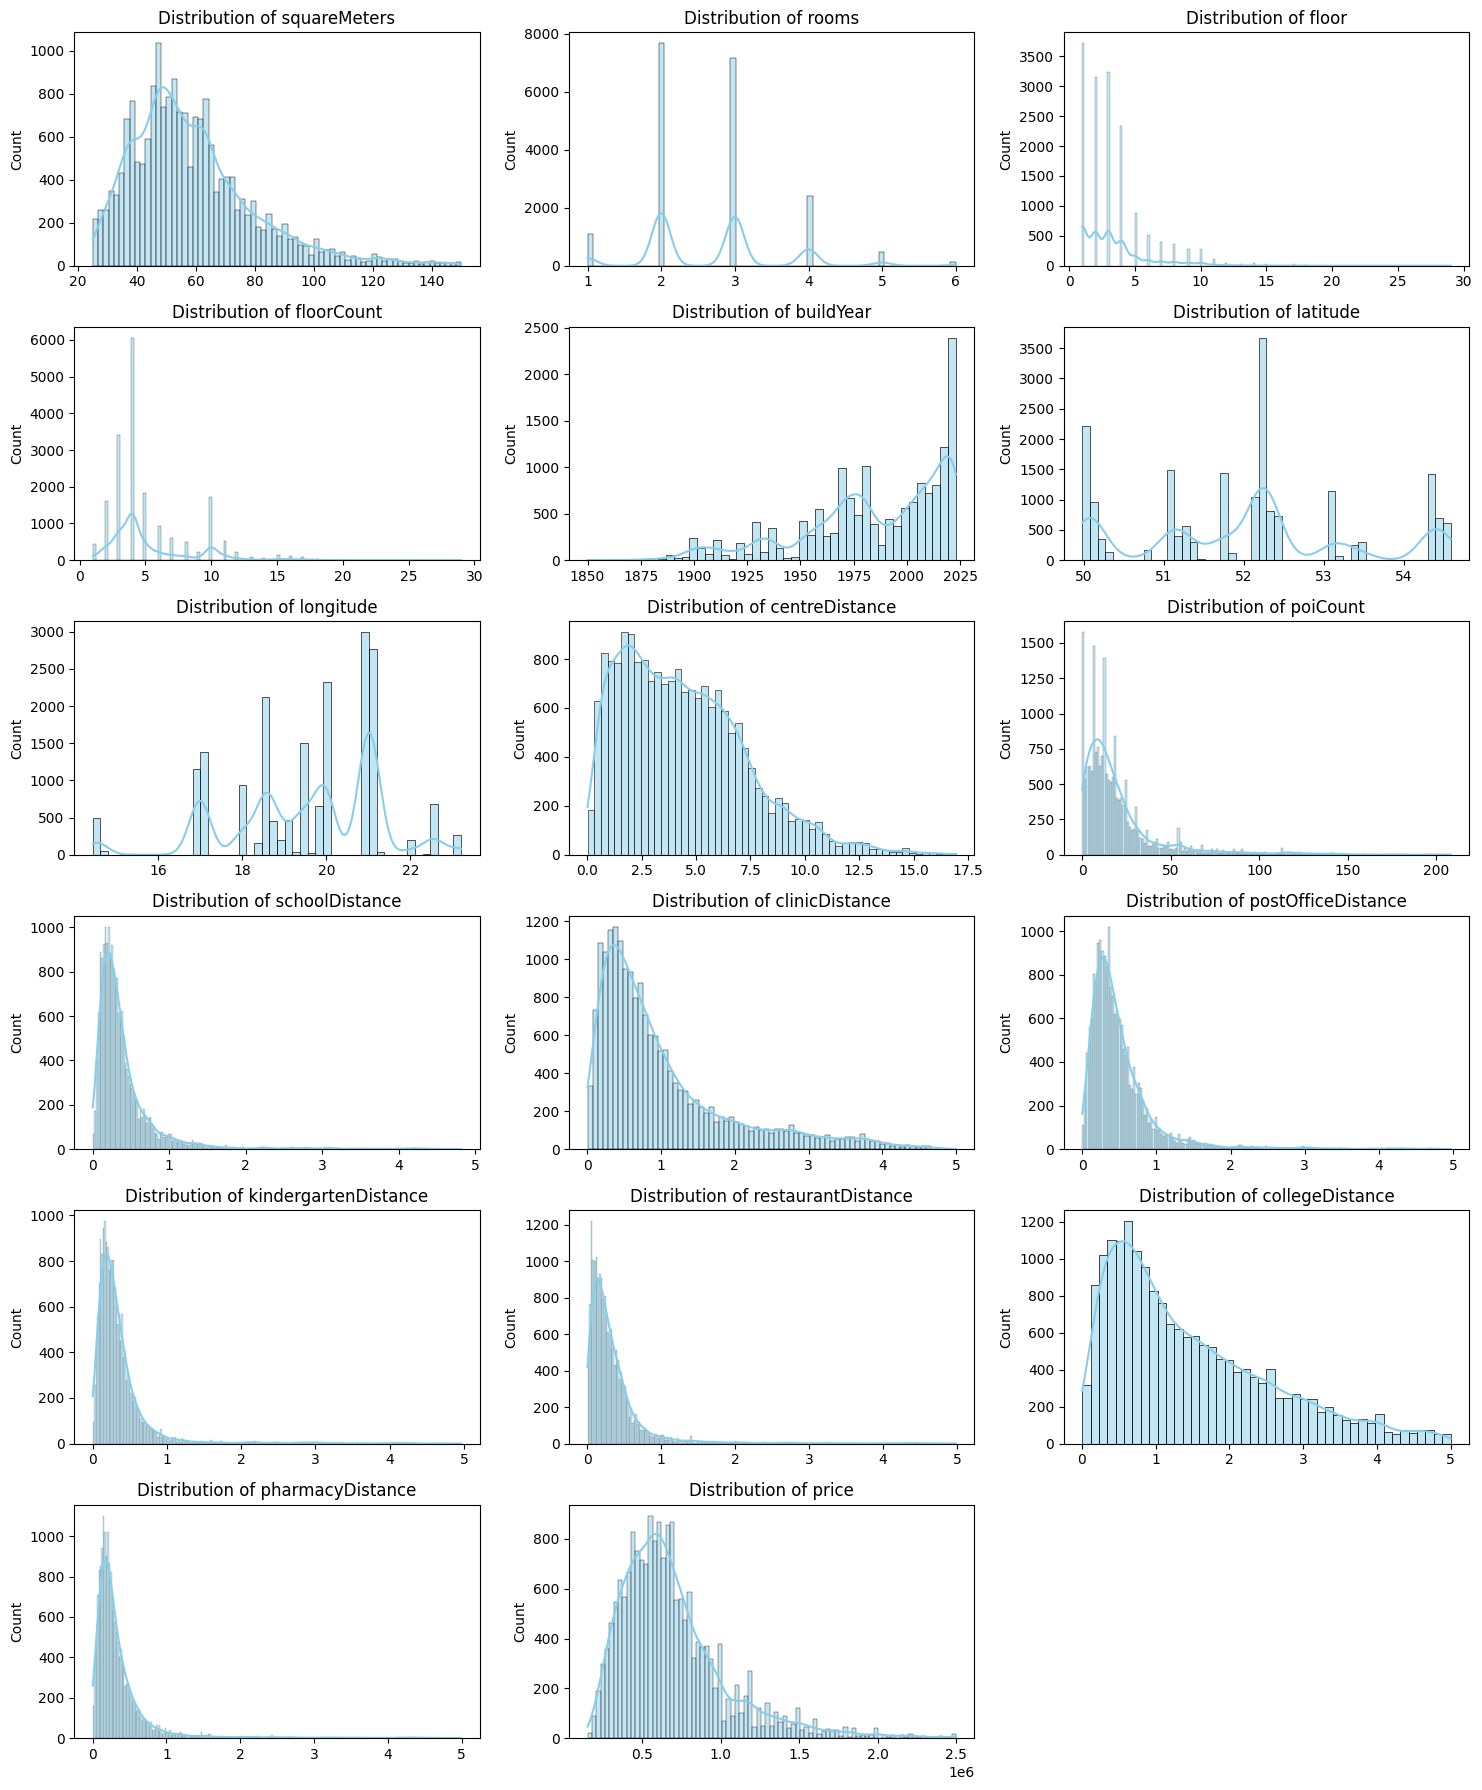

In [67]:
num_cols = df_proje.select_dtypes([np.number]).columns


nrows = len(num_cols) // 3 + 1
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))


for i, col in enumerate(num_cols):
    sns.histplot(df_proje[col], kde=True, color='skyblue', ax=axes[i // ncols, i % ncols])
    axes[i // ncols, i % ncols].set_title(f'Distribution of {col}')
    axes[i // ncols, i % ncols].set_xlabel('')



plt.tight_layout()
plt.ticklabel_format(style='plain')
fig.delaxes(axes[-1, -1])
plt.show()


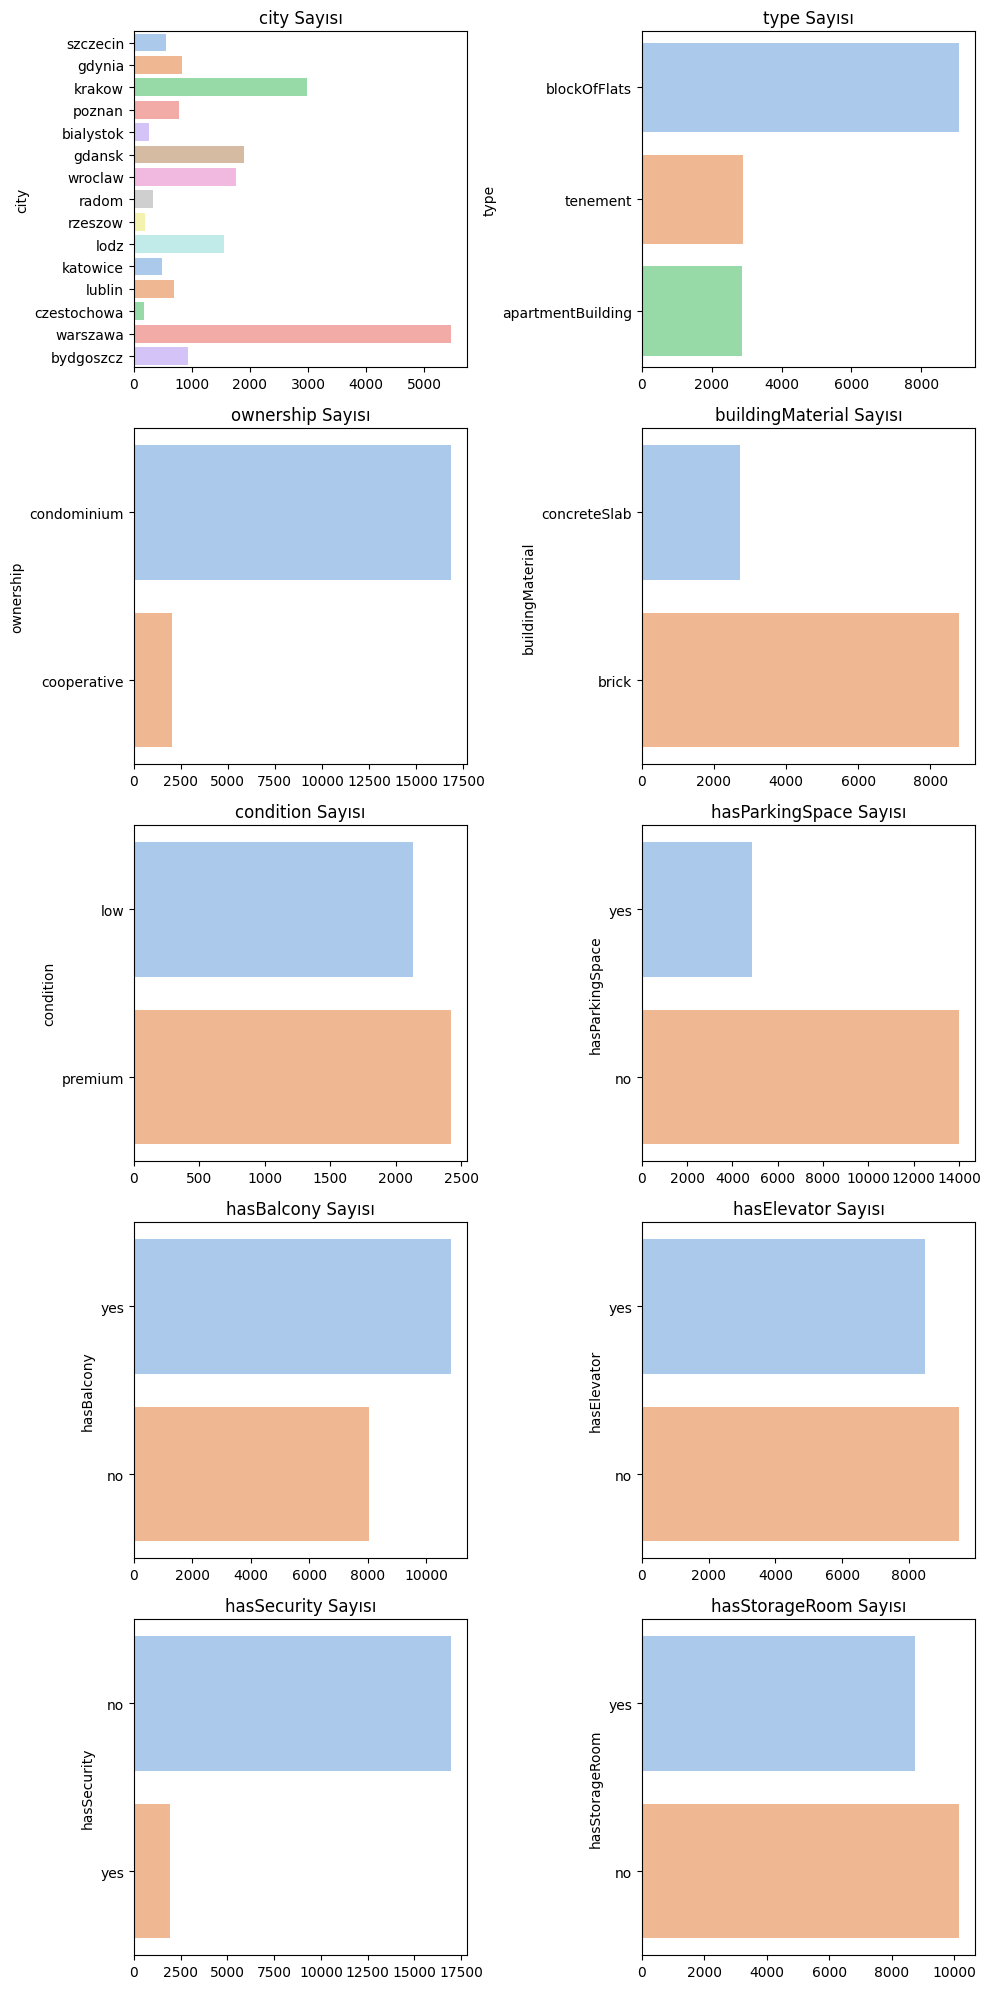

In [68]:

plt.figure(figsize=(10, 2 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y=df_cats[col], palette='pastel')
    plt.title(f'{col} Sayısı')
    plt.xlabel('')

plt.tight_layout()
plt.show()



## **VERİ ÖN İŞLEME**

In [69]:

null_freq_before_drop = df_proje['condition'].isnull().sum()
null_freq_before_drop / df_proje.shape[0] * 100

#conditiondaki boş değerlerin yüzdeliği %75. bu yüzden bu kolon  silinecek

75.87410737900026

In [70]:
df_proje.drop('condition', axis=1, inplace=True)
df_proje


,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
1,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,NaN,0.413,condominium,concreteSlab,yes,yes,yes,no,yes,415000
2,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,1.404,0.205,cooperative,concreteSlab,no,yes,yes,no,yes,395995
3,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,1.857,0.280,condominium,brick,no,no,no,no,no,565000
4,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.310,0.087,condominium,brick,yes,yes,no,no,yes,640000
5,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,2.138,0.514,condominium,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,1.96,...,0.985,0.164,cooperative,brick,yes,yes,no,no,yes,789000
18902,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,3.04,...,0.759,0.428,condominium,NaN,no,yes,no,no,yes,699000
18903,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,0.65,...,0.622,0.205,condominium,brick,yes,no,no,no,no,360000
18904,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,0.65,...,0.622,0.205,condominium,brick,yes,yes,no,no,yes,590000


In [71]:
null_freq_before_drop = df_proje['buildingMaterial'].isnull().sum()
null_freq_before_drop / df_proje.shape[0] * 100

#buildingmaterail ın %39, silinmeyecek.

39.07431896323724

In [72]:

unique_materials = df_proje['buildingMaterial'].unique()
num_unique_materials = len(unique_materials)
print(f"Toplam {num_unique_materials} farklı öznitelik bulunuyor:")
print(unique_materials)


Toplam 3 farklı öznitelik bulunuyor:
['concreteSlab' 'brick' nan]


In [73]:
# 'buildingMaterial' sütununu en sık kullanılan değerle doldur
df_proje['buildingMaterial'].fillna(df_proje['buildingMaterial'].mode().iloc[0], inplace=True)

# 'type' sütununu en sık kullanılan değerle doldur
df_proje['type'].fillna(df_proje['type'].mode().iloc[0], inplace=True)

# 'hasElevator' sütununu en sık kullanılan değerle doldur
df_proje['hasElevator'].fillna(df_proje['hasElevator'].mode().iloc[0], inplace=True)
df_proje



,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
1,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,6.53,...,NaN,0.413,condominium,concreteSlab,yes,yes,yes,no,yes,415000
2,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,2.15,...,1.404,0.205,cooperative,concreteSlab,no,yes,yes,no,yes,395995
3,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,3.24,...,1.857,0.280,condominium,brick,no,no,no,no,no,565000
4,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,2.27,...,0.310,0.087,condominium,brick,yes,yes,no,no,yes,640000
5,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,4.07,...,2.138,0.514,condominium,brick,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18901,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,1.96,...,0.985,0.164,cooperative,brick,yes,yes,no,no,yes,789000
18902,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,3.04,...,0.759,0.428,condominium,brick,no,yes,no,no,yes,699000
18903,bydgoszcz,blockOfFlats,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,0.65,...,0.622,0.205,condominium,brick,yes,no,no,no,no,360000
18904,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,0.65,...,0.622,0.205,condominium,brick,yes,yes,no,no,yes,590000


In [74]:
dk_floorcount = np.std(df_proje['floorCount']) / np.mean(df_proje['floorCount']) * 100
dk_floorcount
#yüksek dk, median ile doldurulucak

63.138507228599494

In [75]:
#dk değeri yüksek , median kullanıldı
median=df_proje['floorCount'].median()
df_proje['floorCount'].fillna(median , inplace=True )
df_proje.isnull().sum()


city                       0
type                       0
squareMeters               0
rooms                      0
floor                   3438
floorCount                 0
buildYear               3271
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance            14
clinicDistance            88
postOfficeDistance        25
kindergartenDistance      13
restaurantDistance        58
collegeDistance          565
pharmacyDistance          27
ownership                  0
buildingMaterial           0
hasParkingSpace            0
hasBalcony                 0
hasElevator                0
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64

In [76]:
#dk değeri yüksek
dk_floor = np.std(df_proje['floor']) / np.mean(df_proje['floor']) * 100
dk_floor

76.32322043045193

In [77]:
median2=df_proje['floor'].median()
df_proje['floor'].fillna( median2, inplace=True )
df_proje.isnull().sum()

city                       0
type                       0
squareMeters               0
rooms                      0
floor                      0
floorCount                 0
buildYear               3271
latitude                   0
longitude                  0
centreDistance             0
poiCount                   0
schoolDistance            14
clinicDistance            88
postOfficeDistance        25
kindergartenDistance      13
restaurantDistance        58
collegeDistance          565
pharmacyDistance          27
ownership                  0
buildingMaterial           0
hasParkingSpace            0
hasBalcony                 0
hasElevator                0
hasSecurity                0
hasStorageRoom             0
price                      0
dtype: int64

In [78]:
df_proje.drop(df_proje[df_proje['floor'] > df_proje['floorCount']].index, inplace=True)
df_proje.shape
#1400 tane satır siliniş oldu


(18306, 26)

In [79]:
#nümerik öznitelikler için DK hesaplandı
import pandas as pd

# İlgili sütunları seç
selected_columns = ['buildYear', 'schoolDistance', 'clinicDistance', 'postOfficeDistance',
                     'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
                     'pharmacyDistance']

selected_data = df_proje[selected_columns]


def coefficient_of_variation(data):
    mean_value = data.mean()
    std_dev = data.std()

    if mean_value != 0:
        coefficient_var = (std_dev / mean_value) * 100
        return coefficient_var
    else:
        return None


for column in selected_columns:
    cv = coefficient_of_variation(df_proje[column])
    print(f"{column} için Değişim Katsayısı: {cv}%")


buildYear için Değişim Katsayısı: 1.6863450674942388%
schoolDistance için Değişim Katsayısı: 114.01681382079994%
clinicDistance için Değişim Katsayısı: 91.1414317631%
postOfficeDistance için Değişim Katsayısı: 97.50819933052136%
kindergartenDistance için Değişim Katsayısı: 122.17294671817302%
restaurantDistance için Değişim Katsayısı: 134.14345101047616%
collegeDistance için Değişim Katsayısı: 75.58661182040179%
pharmacyDistance için Değişim Katsayısı: 129.44661928800335%


In [80]:
# 'buildYear' sütunundaki boşlukları ortalama değerle doldur
mean_buildYear = df_proje['buildYear'].mean()
df_proje['buildYear'].fillna(np.ceil(mean_buildYear), inplace=True)

columns_to_fill = ['clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
                   'restaurantDistance', 'collegeDistance', 'pharmacyDistance',"schoolDistance"]

# Her bir sütun için döngü
for column in columns_to_fill:
    # NaN değerleri sütunun ortanca değeri ile doldur
    median_value = df_proje[column].median()
    df_proje[column].fillna(median_value, inplace=True)

#buildyear için dk çok düşük ortalama ile doldurulur, diğerleri cok yüksek o yüzden median ile doldurulur.

In [81]:
# floor ve floorcount oranı yeni bir öznitelik olarak eklendi . floorcount ve floor çıkarıldı .
df_proje['floor/floorCount'] = df_proje['floor'] / df_proje['floorCount']
df_proje.drop(['floor', 'floorCount'], axis=1, inplace=True)
df_proje

,city,type,squareMeters,rooms,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,...,pharmacyDistance,ownership,buildingMaterial,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,floor/floorCount
1,szczecin,blockOfFlats,63.00,3.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,...,0.413,condominium,concreteSlab,yes,yes,yes,no,yes,415000,0.400000
2,szczecin,blockOfFlats,36.00,2.0,1985.0,53.442692,14.559690,2.15,16.0,0.273,...,0.205,cooperative,concreteSlab,no,yes,yes,no,yes,395995,0.800000
3,szczecin,tenement,73.02,3.0,1985.0,53.452222,14.553333,3.24,9.0,0.275,...,0.280,condominium,brick,no,no,no,no,no,565000,0.666667
4,szczecin,tenement,87.60,3.0,1985.0,53.435100,14.532900,2.27,32.0,0.175,...,0.087,condominium,brick,yes,yes,no,no,yes,640000,0.666667
5,szczecin,blockOfFlats,66.00,3.0,1985.0,53.410278,14.503611,4.07,1.0,0.218,...,0.514,condominium,brick,no,no,no,no,no,759000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,bydgoszcz,tenement,108.96,5.0,1889.0,53.126000,18.007900,0.65,54.0,0.111,...,0.205,condominium,brick,no,no,no,no,yes,795000,0.500000
18901,bydgoszcz,blockOfFlats,84.00,3.0,2000.0,53.112927,17.975630,1.96,7.0,0.056,...,0.164,cooperative,brick,yes,yes,no,no,yes,789000,0.750000
18903,bydgoszcz,blockOfFlats,50.12,2.0,1985.0,53.126000,18.007900,0.65,54.0,0.111,...,0.205,condominium,brick,yes,no,no,no,no,360000,1.000000
18904,bydgoszcz,tenement,100.00,4.0,1910.0,53.126000,18.007900,0.65,54.0,0.111,...,0.205,condominium,brick,yes,yes,no,no,yes,590000,0.750000


## **## kategorik özniteliklerin sayısallaştırılması:**

In [82]:
# 'hasBalcony' sütununu 1 ve 0'a dönüştür
df_proje['hasBalcony'] = df_proje['hasBalcony'].map({'yes': 1, 'no': 0})

# 'hasElevator' sütununu 1 ve 0'a dönüştür
df_proje['hasElevator'] = df_proje['hasElevator'].map({'yes': 1, 'no': 0})

# 'hasSecurity' sütununu 1 ve 0'a dönüştür
df_proje['hasSecurity'] = df_proje['hasSecurity'].map({'yes': 1, 'no': 0})

# 'hasStorageRoom' sütununu 1 ve 0'a dönüştür
df_proje['hasStorageRoom'] = df_proje['hasStorageRoom'].map({'yes': 1, 'no': 0})

# 'hasParkingSpace' sütununu 1 ve 0'a dönüştür
df_proje['hasParkingSpace'] = df_proje['hasParkingSpace'].map({'yes': 1, 'no': 0})


In [83]:
# bildingmaterial ,ownership,city one hot encoder ile sayısallaştırıldı.
df_proje = pd.get_dummies(df_proje, columns=['ownership'])
df_proje=pd.get_dummies(df_proje, columns=["buildingMaterial"])
df_proje=pd.get_dummies(df_proje, columns=["city"])
df_proje=pd.get_dummies(df_proje, columns=["type"])


In [84]:
df_proje

,squareMeters,rooms,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,type_tenement
1,63.00,3.0,1980.0,53.378933,14.625296,6.53,9.0,0.118,1.389,0.628,...,0,0,0,0,1,0,0,0,1,0
2,36.00,2.0,1985.0,53.442692,14.559690,2.15,16.0,0.273,0.492,0.652,...,0,0,0,0,1,0,0,0,1,0
3,73.02,3.0,1985.0,53.452222,14.553333,3.24,9.0,0.275,0.672,0.367,...,0,0,0,0,1,0,0,0,0,1
4,87.60,3.0,1985.0,53.435100,14.532900,2.27,32.0,0.175,0.259,0.223,...,0,0,0,0,1,0,0,0,0,1
5,66.00,3.0,1985.0,53.410278,14.503611,4.07,1.0,0.218,1.690,0.504,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,108.96,5.0,1889.0,53.126000,18.007900,0.65,54.0,0.111,0.205,0.351,...,0,0,0,0,0,0,0,0,0,1
18901,84.00,3.0,2000.0,53.112927,17.975630,1.96,7.0,0.056,1.098,0.448,...,0,0,0,0,0,0,0,0,1,0
18903,50.12,2.0,1985.0,53.126000,18.007900,0.65,54.0,0.111,0.205,0.351,...,0,0,0,0,0,0,0,0,1,0
18904,100.00,4.0,1910.0,53.126000,18.007900,0.65,54.0,0.111,0.205,0.351,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df_proje.info() #hepsinin sayısallaştığını gözlemledik

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18306 entries, 1 to 18905
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   squareMeters                   18306 non-null  float64
 1   rooms                          18306 non-null  float64
 2   buildYear                      18306 non-null  float64
 3   latitude                       18306 non-null  float64
 4   longitude                      18306 non-null  float64
 5   centreDistance                 18306 non-null  float64
 6   poiCount                       18306 non-null  float64
 7   schoolDistance                 18306 non-null  float64
 8   clinicDistance                 18306 non-null  float64
 9   postOfficeDistance             18306 non-null  float64
 10  kindergartenDistance           18306 non-null  float64
 11  restaurantDistance             18306 non-null  float64
 12  collegeDistance                18306 non-null 

In [86]:
df_proje.isnull().sum() #boş öznitelik kalmadığını gözlemledik


squareMeters                     0
rooms                            0
buildYear                        0
latitude                         0
longitude                        0
centreDistance                   0
poiCount                         0
schoolDistance                   0
clinicDistance                   0
postOfficeDistance               0
kindergartenDistance             0
restaurantDistance               0
collegeDistance                  0
pharmacyDistance                 0
hasParkingSpace                  0
hasBalcony                       0
hasElevator                      0
hasSecurity                      0
hasStorageRoom                   0
price                            0
floor/floorCount                 0
ownership_condominium            0
ownership_cooperative            0
buildingMaterial_brick           0
buildingMaterial_concreteSlab    0
city_bialystok                   0
city_bydgoszcz                   0
city_czestochowa                 0
city_gdansk         

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_proje.corr()
print(correlation_matrix)

                               squareMeters     rooms  buildYear  latitude  \
squareMeters                       1.000000  0.823419   0.007919  0.041015   
rooms                              0.823419  1.000000   0.018929  0.038333   
buildYear                          0.007919  0.018929   1.000000 -0.004232   
latitude                           0.041015  0.038333  -0.004232  1.000000   
longitude                         -0.013421  0.005191   0.101295 -0.228874   
centreDistance                     0.078686  0.075619   0.341942  0.096822   
poiCount                           0.014875 -0.020111  -0.354036 -0.060776   
schoolDistance                     0.069614  0.073697   0.242205  0.191764   
clinicDistance                     0.013927  0.044456   0.233566  0.144694   
postOfficeDistance                 0.050691  0.057044   0.220886  0.140345   
kindergartenDistance               0.061521  0.062359   0.108263  0.211947   
restaurantDistance                 0.025305  0.052414   0.152480

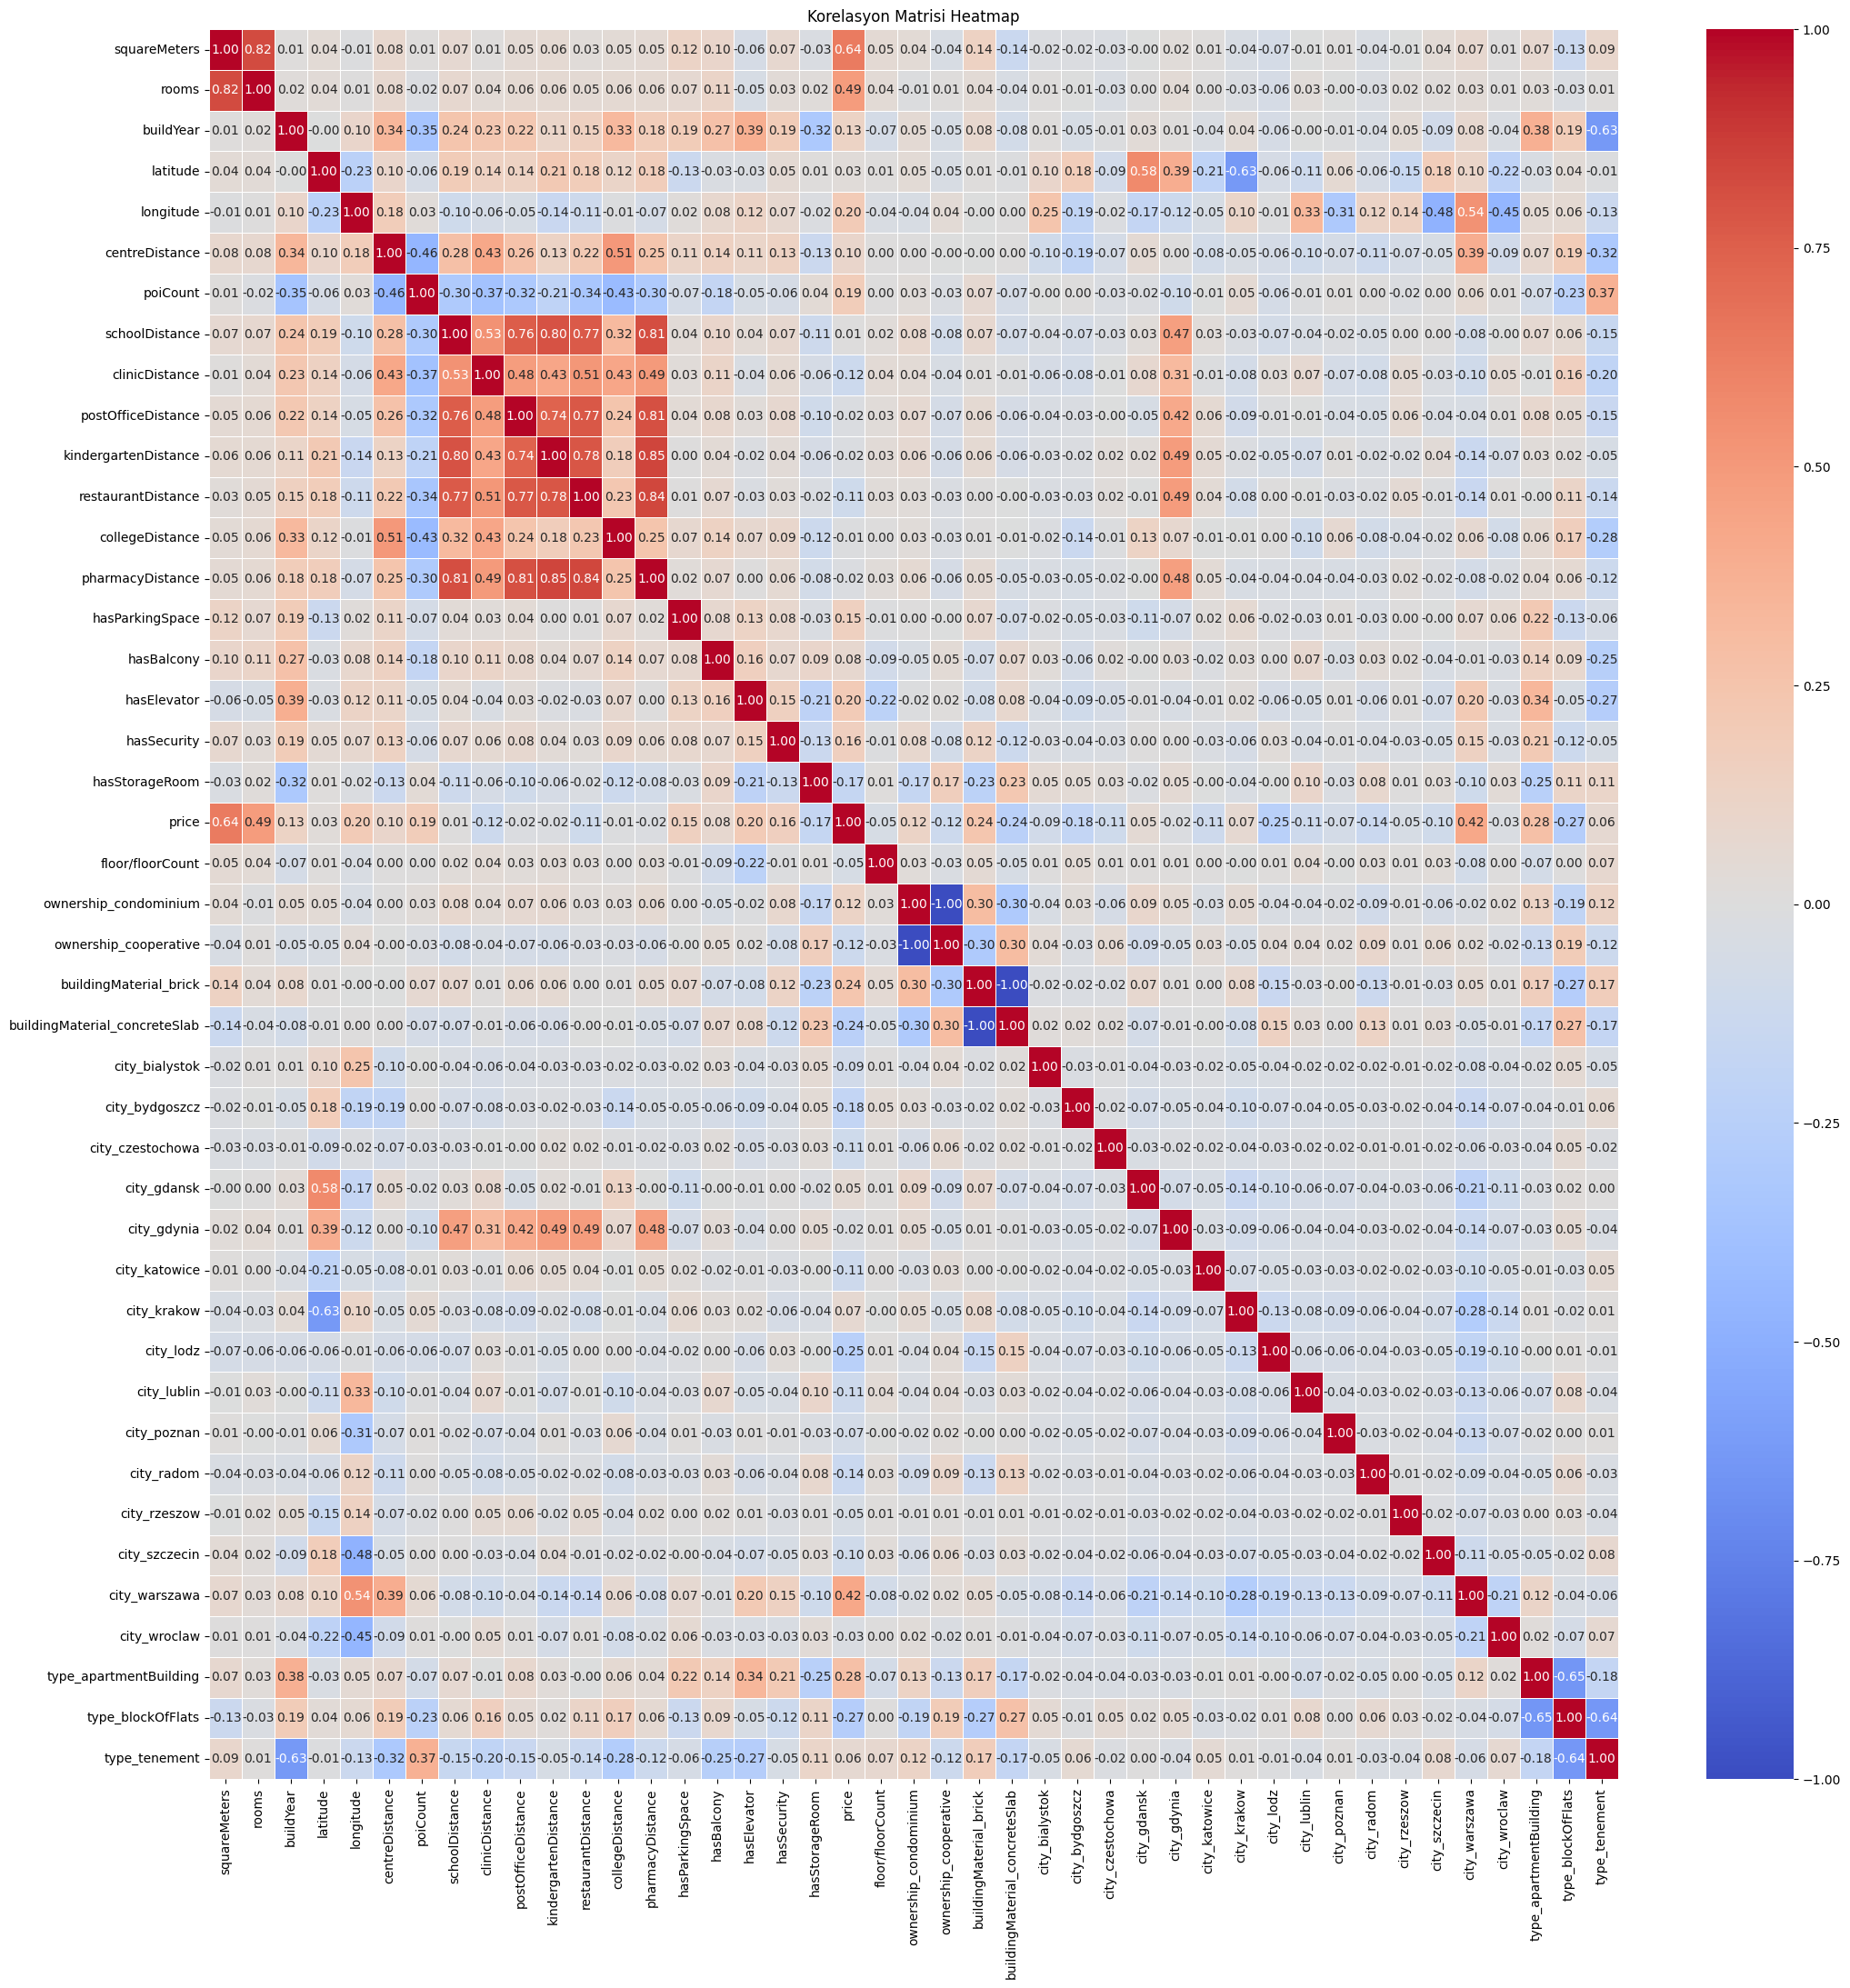

In [88]:
# Korelasyon matrisini heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Korelasyon Matrisi Heatmap")
plt.show()


In [89]:
# "price" değişkeni ile diğer değişkenlerin korelasyonlarını sırala
sorted_correlations = correlation_matrix["price"].abs().sort_values(ascending=False)


correlation_df = pd.DataFrame({
    'Değişken': sorted_correlations.index,
    'Korelasyon': sorted_correlations.values
})
correlation_df.to_csv('correlation_table.csv', index=False)




# **MAKİNE ÖĞRENMESİ İLE TAHMİN MODELLERİ**

In [90]:
df_proje.columns


Index(['squareMeters', 'rooms', 'buildYear', 'latitude', 'longitude',
       'centreDistance', 'poiCount', 'schoolDistance', 'clinicDistance',
       'postOfficeDistance', 'kindergartenDistance', 'restaurantDistance',
       'collegeDistance', 'pharmacyDistance', 'hasParkingSpace', 'hasBalcony',
       'hasElevator', 'hasSecurity', 'hasStorageRoom', 'price',
       'floor/floorCount', 'ownership_condominium', 'ownership_cooperative',
       'buildingMaterial_brick', 'buildingMaterial_concreteSlab',
       'city_bialystok', 'city_bydgoszcz', 'city_czestochowa', 'city_gdansk',
       'city_gdynia', 'city_katowice', 'city_krakow', 'city_lodz',
       'city_lublin', 'city_poznan', 'city_radom', 'city_rzeszow',
       'city_szczecin', 'city_warszawa', 'city_wroclaw',
       'type_apartmentBuilding', 'type_blockOfFlats', 'type_tenement'],
      dtype='object')

In [91]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
columns_to_standardize = ['squareMeters', 'rooms','buildYear',
                           'latitude', 'longitude', 'centreDistance', 'poiCount', 'schoolDistance',
                           'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
                           'restaurantDistance', 'collegeDistance', 'pharmacyDistance']


X_to_standardize = df_proje[columns_to_standardize]
X_standardized = scaler.fit_transform(X_to_standardize)
df_proje[columns_to_standardize] = X_standardized
df_proje




,squareMeters,rooms,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,...,city_lublin,city_poznan,city_radom,city_rzeszow,city_szczecin,city_warszawa,city_wroclaw,type_apartmentBuilding,type_blockOfFlats,type_tenement
1,0.221854,0.364032,-0.157192,1.011338,-2.779382,0.764723,-0.479456,-0.624935,0.447424,0.233462,...,0,0,0,0,1,0,0,0,1,0
2,-1.067243,-0.747371,0.007037,1.058569,-2.816549,-0.782882,-0.183639,-0.293588,-0.550560,0.281590,...,0,0,0,0,1,0,0,0,1,0
3,0.700252,0.364032,0.007037,1.065629,-2.820151,-0.397747,-0.479456,-0.289312,-0.350296,-0.289925,...,0,0,0,0,1,0,0,0,0,1
4,1.396365,0.364032,0.007037,1.052945,-2.831726,-0.740482,0.492513,-0.503085,-0.809791,-0.578690,...,0,0,0,0,1,0,0,0,0,1
5,0.365087,0.364032,0.007037,1.034557,-2.848319,-0.104480,-0.817532,-0.411162,0.782310,-0.015197,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,2.416183,2.586840,-3.146167,0.823969,-0.863071,-1.312883,1.422222,-0.639899,-0.869871,-0.322010,...,0,0,0,0,0,0,0,0,0,1
18901,1.224485,0.364032,0.499725,0.814284,-0.881352,-0.850015,-0.563975,-0.757474,0.123663,-0.127494,...,0,0,0,0,0,0,0,0,1,0
18903,-0.393093,-0.747371,0.007037,0.823969,-0.863071,-1.312883,1.422222,-0.639899,-0.869871,-0.322010,...,0,0,0,0,0,0,0,0,1,0
18904,1.988394,1.475436,-2.456404,0.823969,-0.863071,-1.312883,1.422222,-0.639899,-0.869871,-0.322010,...,0,0,0,0,0,0,0,0,0,1


In [92]:
# Bağımlı değişken (y)
y = df_proje["price"].values

# Bağımsız değişkenler (X) , korelasyonu düşük olanlar çıkarıldı
X = df_proje.drop(['price', 'kindergartenDistance', 'postOfficeDistance', 'pharmacyDistance', 'collegeDistance', 'schoolDistance'], axis=1).values



In [93]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


## **LINEER REGRESYON**

In [94]:
#LİNEER REGRESYON İÇİN HYPERPARAMETRE TUNNING YAPILDI AMA DEFAULT DEĞERLER DÖNDÜ.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

# Hiperparametre uzayı
param_dist = {'fit_intercept': [True, False],

              'positive': [True, False]}


random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

# En iyi modelle tahminle
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Metrikleri hesapla
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print("En iyi hiperparametreler:", best_params)
print("Eğitim RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Eğitim MAE:", train_mae)
print("Test MAE:", test_mae)
print("Eğitim R^2:", train_r2)
print("Test R^2:", test_r2)

# Gerçek fiyatlar
gercek_fiyatlar = df_proje["price"]

# Tahminlenen fiyatlar
tahmin_fiyatlar = best_model.predict(X)


tahminler_df = pd.DataFrame({"Gerçek Fiyat": gercek_fiyatlar, "Tahminlenen Fiyat": tahmin_fiyatlar})


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


En iyi hiperparametreler: {'positive': False, 'fit_intercept': False}
Eğitim RMSE: 173542.88134074645
Test RMSE: 171664.7985444316
Eğitim MAE: 122399.98998979622
Test MAE: 121523.31234879328
Eğitim R^2: 0.7463602518450501
Test R^2: 0.7522723989253882


In [95]:
#LINEER REGRESYON
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

# Eğitim ve test setleri üzerinde tahmin
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrikler
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)


print("Eğitim RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Eğitim MAE:", train_mae)
print("Test MAE:", test_mae)
print("Eğitim R^2:", train_r2)
print("Test R^2:", test_r2)
print("Eğitim MSE:", train_mse)
print("Test MSE:", test_mse)


# Gerçek fiyatlar
gercek_fiyatlar = df_proje["price"]

# Tahminlenen fiyatlar
tahmin_fiyatlar = model.predict(X)
tahminler_df = pd.DataFrame({
    "Gerçek Fiyat": gercek_fiyatlar,
    "Tahminlenen Fiyat": tahmin_fiyatlar,

})
tahminler_df.head(10)




Eğitim RMSE: 173542.88134074645
Test RMSE: 171664.79854443166
Eğitim MAE: 122399.98998979632
Test MAE: 121523.3123487934
Eğitim R^2: 0.7463602518450501
Test R^2: 0.7522723989253881
Eğitim MSE: 30117131664.048397
Test MSE: 29468803059.300304


,Gerçek Fiyat,Tahminlenen Fiyat
1,415000,466180.077691
2,395995,223968.791156
3,565000,595694.258523
4,640000,817325.406711
5,759000,472592.379343
6,499000,398537.969313
7,370000,325739.551584
8,629000,624899.829521
9,399000,298457.527087
10,325000,557918.630956


## **RANDOMFOREST REGRESSOR**

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd


rf_model = RandomForestRegressor(random_state=42)

# Hiperparametre uzayı
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Ağaç sayısı
    'max_features': ['auto', 'sqrt', 'log2'],  # Bölünmelerde göz önünde bulundurulacak özellik sayısı
    'max_depth': [None, 10, 20, 30],  # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],  # İki düğüm arasında minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]  # Bir yaprak düğümdeki minimum örnek sayısı
}


random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


random_search_rf.fit(X_train, y_train)


best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

# En iyi modelle tahminler yap
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

# Metrikleri hesapla
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)


print("Random Forest Eğitim MSE:", train_mse_rf)
print("Random Forest Test MSE:", test_mse_rf)
print("Random Forest Eğitim RMSE:", train_rmse_rf)
print("Random Forest Test RMSE:", test_rmse_rf)
print("Random Forest Eğitim MAE:", train_mae_rf)
print("Random Forest Test MAE:", test_mae_rf)
print("Random Forest Eğitim R^2:", train_r2_rf)
print("Random Forest Test R^2:", test_r2_rf)

# Gerçek fiyatlar
gercek_fiyatlar_rf = df_proje["price"]

# Tahminlenen fiyatlar
tahmin_fiyatlar_rf = best_model_rf.predict(X)


tahminler_df


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Random Forest Eğitim MSE: 5301843296.187014
Random Forest Test MSE: 14831317100.69222
Random Forest Eğitim RMSE: 72813.75760244086
Random Forest Test RMSE: 121783.89507932574
Random Forest Eğitim MAE: 46362.43652210567
Random Forest Test MAE: 79649.62977875513
Random Forest Eğitim R^2: 0.955349061344804
Random Forest Test R^2: 0.8753214849365317


,Gerçek Fiyat,Tahminlenen Fiyat
1,415000,466180.077691
2,395995,223968.791156
3,565000,595694.258523
4,640000,817325.406711
5,759000,472592.379343
...,...,...
18900,795000,910252.075684
18901,789000,653836.441903
18903,360000,429563.282274
18904,590000,880732.803679


In [97]:
print(best_params_rf)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None}


In [98]:

# RANDOMFOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pickle



rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features='auto', max_depth=None)


rf_model.fit(X_train, y_train)


y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Metrikleri hesapla
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)


print("Random Forest Eğitim MSE:", train_mse_rf)
print("Random Forest Test MSE:", test_mse_rf)
print("Random Forest Eğitim RMSE:", train_rmse_rf)
print("Random Forest Test RMSE:", test_rmse_rf)
print("Random Forest Eğitim MAE:", train_mae_rf)
print("Random Forest Test MAE:", test_mae_rf)
print("Random Forest Eğitim R^2:", train_r2_rf)
print("Random Forest Test R^2:", test_r2_rf)

# Gerçek fiyatlar
gercek_fiyatlar_rf = df_proje["price"]

# Tahminlenen fiyatlar
tahmin_fiyatlar_rf = rf_model.predict(X)


tahminler_df_rf = pd.DataFrame({"Gerçek Fiyat": gercek_fiyatlar_rf, "Tahminlenen Fiyat": tahmin_fiyatlar_rf})

tahminler_df_rf

pickle.dump(rf_model, open('model_veri_bilmi_son.pkl', 'wb')) #en iyi performansı gösteren model olduğu için sonra kullanılmak üzere kaydedildi.



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest Eğitim MSE: 5284595996.636358
Random Forest Test MSE: 14904561958.347618
Random Forest Eğitim RMSE: 72695.22678028014
Random Forest Test RMSE: 122084.24123672808
Random Forest Eğitim MAE: 46304.27999787619
Random Forest Test MAE: 79794.2538354906
Random Forest Eğitim R^2: 0.9554943142448206
Random Forest Test R^2: 0.8747057567428379


## **KARAR AĞAÇLARI ALGORİTMASI**

In [99]:
#KARARAĞACI İÇİN HYPERPARAMETRE TUNING
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


model = DecisionTreeRegressor()

# hiperparametre uzayı
param_dist = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)


random_search.fit(X_train, y_train)

print("En iyi parametreler: ", random_search.best_params_)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R^2) Score: {r2}')


En iyi parametreler:  {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'friedman_mse'}
Mean Squared Error: 22898197715.65501
R-squared (R^2) Score: 0.807507770925866


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [100]:
# KARAR AĞACI
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np



reg_model = DecisionTreeRegressor(splitter='best', min_samples_split=2, min_samples_leaf=4, max_depth=30, criterion='friedman_mse', random_state=42)


reg_model.fit(X_train, y_train)
y_train_pred = reg_model.predict(X_train)

# Eğitim seti üzerinde metrikler
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)


y_test_pred = reg_model.predict(X_test)

# Test seti üzerinde metrikler
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


print("Eğitim Seti MSE:", train_mse)
print("Eğitim Seti RMSE:", train_rmse)
print("Eğitim Seti R^2:", train_r2)
print("Eğitim Seti MAE:", train_mae)
print("\nTest Seti MSE:", test_mse)
print("Test Seti RMSE:", test_rmse)
print("Test Seti R^2:", test_r2)
print("Test Seti MAE:", test_mae)


predictions_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_test_pred})
predictions_df.head(10)


Eğitim Seti MSE: 4736692940.247581
Eğitim Seti RMSE: 68823.6364939225
Eğitim Seti R^2: 0.9601086312649791
Eğitim Seti MAE: 43654.406655415514

Test Seti MSE: 23288210290.76873
Test Seti RMSE: 152604.75186169246
Test Seti R^2: 0.8042291552512684
Test Seti MAE: 99737.33390158904


,Gerçek Değerler,Tahminler
0,498200,4.632694e+05
1,697641,7.048000e+05
2,1024000,1.344250e+06
3,999000,1.307626e+06
4,350000,2.875000e+05
5,1200000,1.175167e+06
6,599000,5.742500e+05
7,775000,7.349998e+05
8,349000,2.697143e+05
9,445000,3.932500e+05


**KNN ALGORİTMASI**

In [101]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import numpy as np


knn_model = KNeighborsRegressor()

# hiperparametre uzayı
param_dist = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


random_search = RandomizedSearchCV(knn_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

# En iyi hiperparametre kombinasyonu
best_params = random_search.best_params_
print(f'En iyi hiperparametreler: {best_params}')

# En iyi modeli kullanarak tahmin yap
y_train_pred = random_search.predict(X_train)
y_test_pred = random_search.predict(X_test)

# Train ve test setleri için R2 skorlarını hesapla
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')


En iyi hiperparametreler: {'weights': 'distance', 'p': 1, 'n_neighbors': 12}
Train R2 Score: 0.9999807609050335
Test R2 Score: 0.8392130642464762


In [102]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd




knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)


y_train_pred = knn_model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print(f'Eğitim Seti Mean Squared Error (MSE): {train_mse}')
train_r2 = r2_score(y_train, y_train_pred)
print(f'Eğitim Seti R-squared (R2) Score: {train_r2}')
train_mae = mean_absolute_error(y_train, y_train_pred)
print(f'Eğitim Seti Mean Absolute Error (MAE): {train_mae}')
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'Eğitim Seti Root Mean Squared Error (RMSE): {train_rmse}')


y_test_pred = knn_model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Test Seti Mean Squared Error (MSE): {test_mse}')
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test Seti R-squared (R2) Score: {test_r2}')
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Test Seti Mean Absolute Error (MAE): {test_mae}')
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'Test Seti Root Mean Squared Error (RMSE): {test_rmse}')


predictions_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahminler': y_test_pred})
predictions_df.head(10)




Eğitim Seti Mean Squared Error (MSE): 15944007068.399916
Eğitim Seti R-squared (R2) Score: 0.8657231378299824
Eğitim Seti Mean Absolute Error (MAE): 84223.97193389785
Eğitim Seti Root Mean Squared Error (RMSE): 126269.58093064187
Test Seti Mean Squared Error (MSE): 21721471910.82853
Test Seti R-squared (R2) Score: 0.8173998408604899
Test Seti Mean Absolute Error (MAE): 100107.56919716003
Test Seti Root Mean Squared Error (RMSE): 147382.06102110437


,Gerçek Değerler,Tahminler
0,498200,511270.0
1,697641,1114200.0
2,1024000,1294800.0
3,999000,1445200.0
4,350000,321800.0
5,1200000,1006266.8
6,599000,644600.0
7,775000,678600.0
8,349000,382600.0
9,445000,445600.0
